## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Data Understanding**

In the data understanding phase, the process involves examining the information within the dataset, followed by renaming columns for clarity, and then checking for missing values, duplicate data, and outliers. Subsequently, exploratory data analysis (EDA) is conducted to visualize the data

In [2]:
# Load dataset
df = pd.read_excel('dataset/Concrete_Data.xls')

In [3]:
# Look at the first 5 rows of the dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# Check the shape of the dataset
df.shape

(1030, 9)

In [5]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

#### Rename Column

Column names were renamed to make it more concise

In [6]:
df.columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age',
    'Concrete Compressive Strength'
]

print(df.columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete Compressive Strength'],
      dtype='object')


#### Check Missing Value

In [7]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete Compressive Strength    0
dtype: int64

There are no missing values, so there is no need to handle missing values

#### Check Duplicate Data

In [8]:
df.duplicated().sum()

25

The data contains 25 duplicate entries, these duplicate data will be removed during the data preparation stage

#### Check Outliers Data

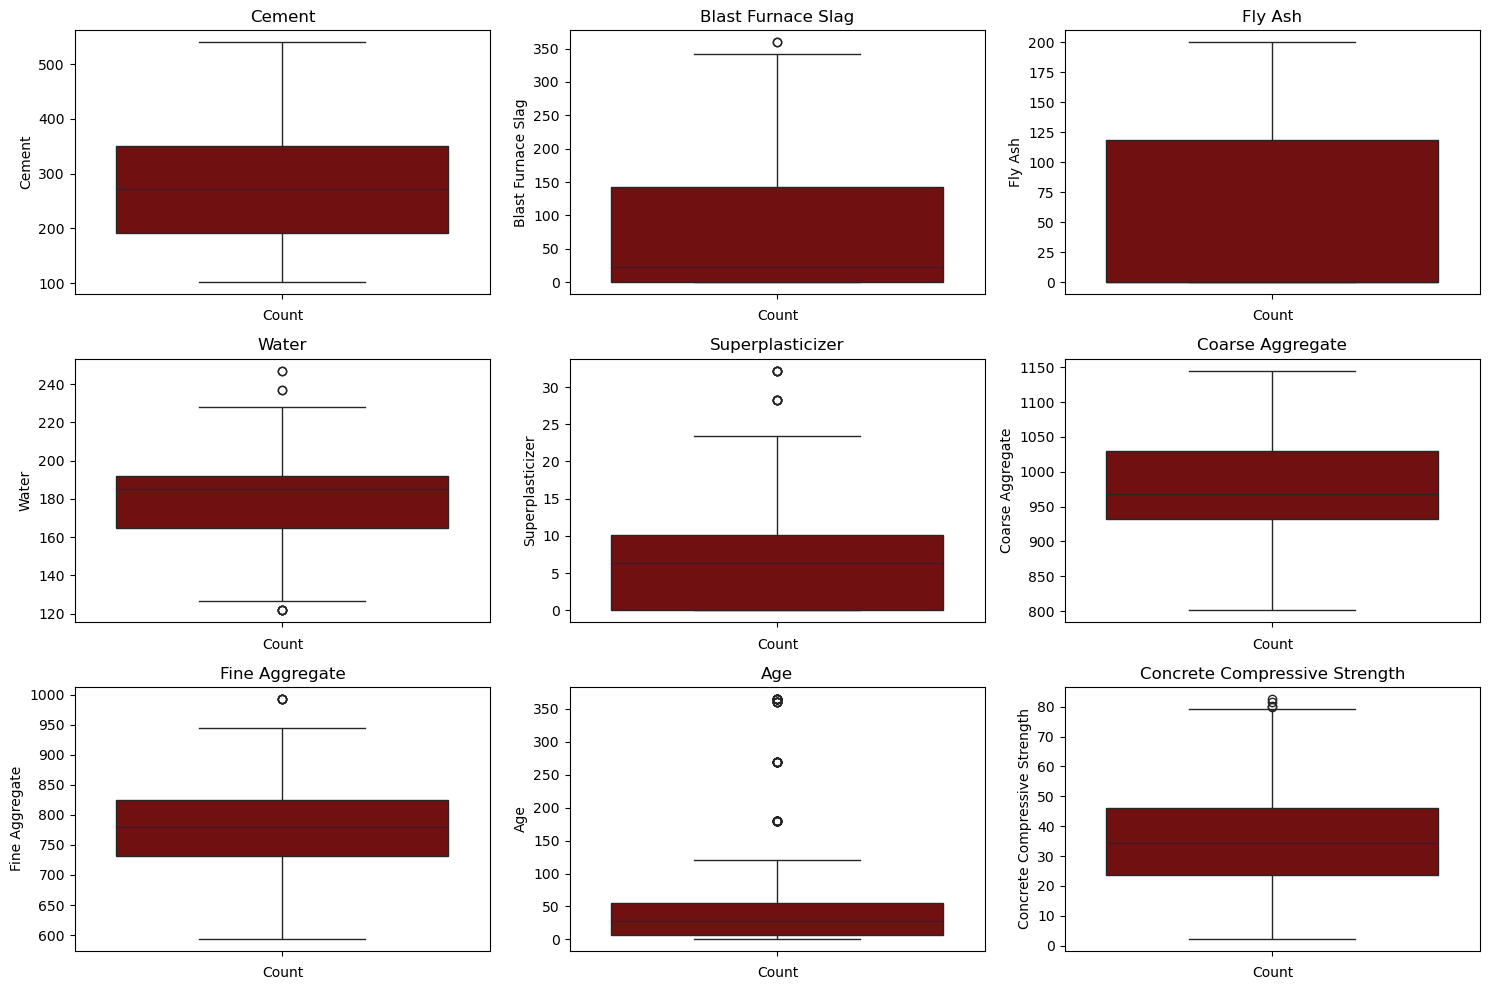

Cement:
  Total Outliers: 0
  Outlier Percentage: 0.00%

Blast Furnace Slag:
  Total Outliers: 2
  Outlier Percentage: 0.19%

Fly Ash:
  Total Outliers: 0
  Outlier Percentage: 0.00%

Water:
  Total Outliers: 9
  Outlier Percentage: 0.87%

Superplasticizer:
  Total Outliers: 10
  Outlier Percentage: 0.97%

Coarse Aggregate:
  Total Outliers: 0
  Outlier Percentage: 0.00%

Fine Aggregate:
  Total Outliers: 5
  Outlier Percentage: 0.49%

Age:
  Total Outliers: 59
  Outlier Percentage: 5.73%

Concrete Compressive Strength:
  Total Outliers: 4
  Outlier Percentage: 0.39%



In [9]:
# Function to detect outliers  
def detect_outliers(df):  
    outliers_info = {}  
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        # Calculate outliers  
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  
        outliers_info[column] = {  
            'total_outliers': len(column_outliers),  
            'percentage': (len(column_outliers) / len(df)) * 100  
        }  
    
    return outliers_info  

# Check outliers before creating boxplot  
outlier_info = detect_outliers(df)  

# Set figure size  
plt.figure(figsize=(15, 10))  

# Create boxplot for each numeric column  
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column], color='maroon')
    plt.title(column)
    plt.xlabel('Count')

# Add space between subplots  
plt.subplots_adjust(hspace=0.5, wspace=0.3)  

plt.tight_layout() 
plt.show()

# Display outlier information in the console  
for column, info in outlier_info.items():  
    print(f"{column}:")  
    print(f"  Total Outliers: {info['total_outliers']}")  
    print(f"  Outlier Percentage: {info['percentage']:.2f}%\n")

The data contains outliers, which need to be removed during the data preparation stage

### **Exploratory Data Analysis**

#### Descriptive Statistics

In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### Distribution of Each Feature

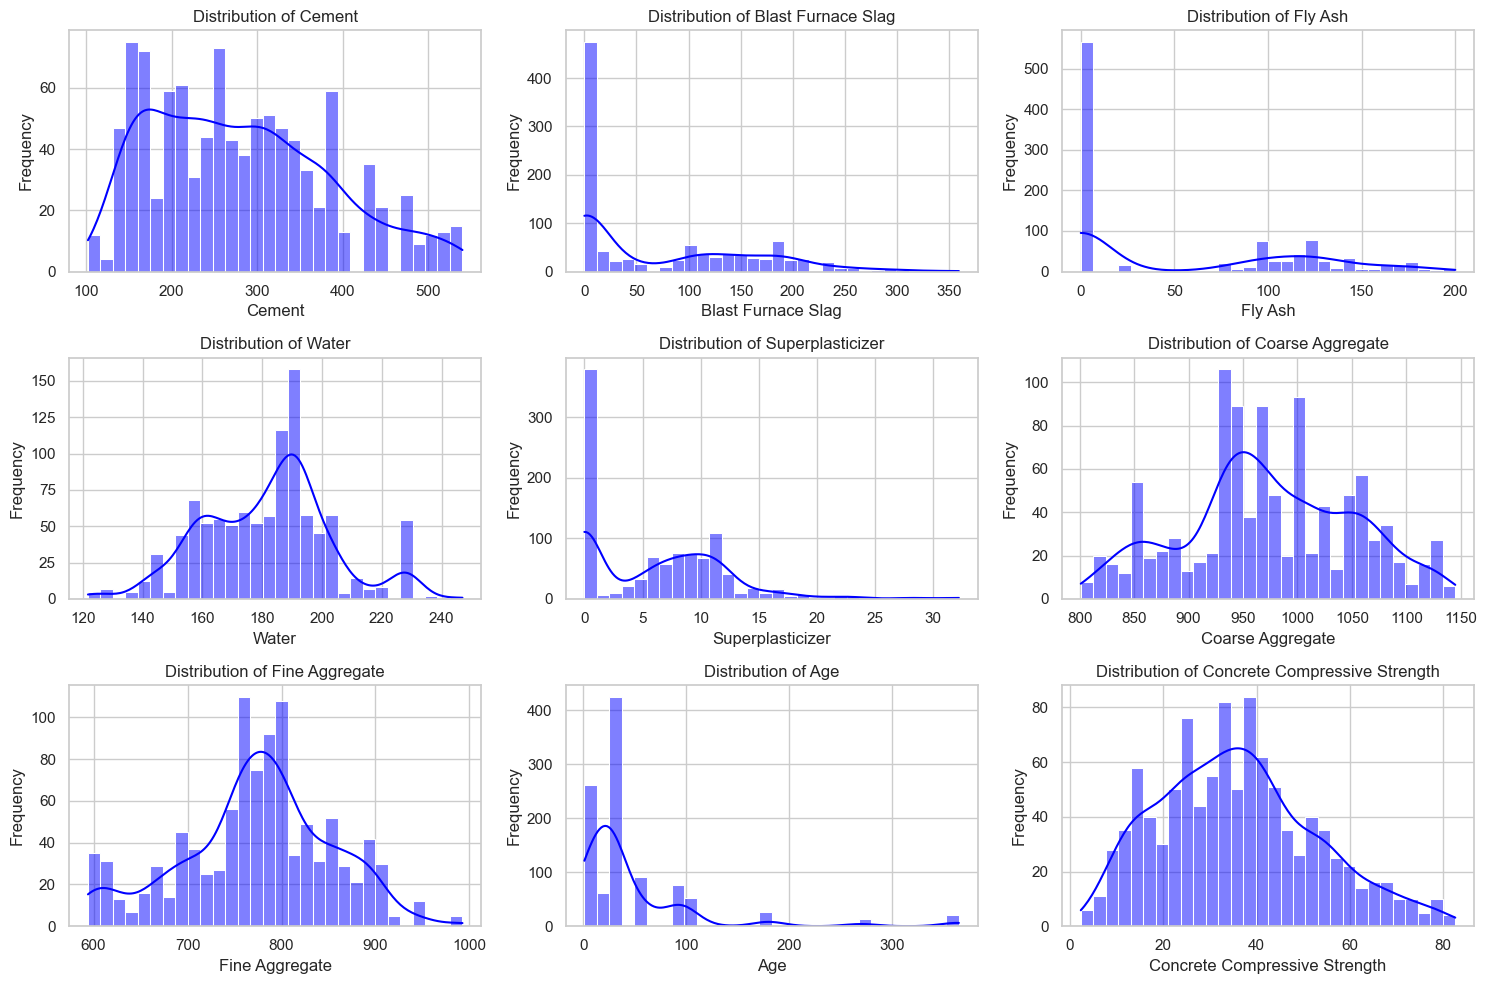

In [11]:
sns.set(style="whitegrid")  

plt.figure(figsize=(15, 10))  
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):  
    plt.subplot(3, 3, i + 1)  
    sns.histplot(df[column], bins=30, kde=True, color='blue')  
    plt.title(f'Distribution of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()

1. Cement: The distribution shows a right-skewed pattern, indicating that most samples have lower cement content, with fewer samples having higher values.
2. Blast Furnace Slag: The distribution is heavily right-skewed, with most samples showing very low usage, confirming that it is less common in the mix.
3. Fly Ash: Similar to Blast Furnace Slag, the distribution is right-skewed, indicating low usage across samples, reinforcing its rarity in the concrete mix.
4. Water: The distribution is relatively uniform, peaking around 180-200, suggesting a balanced and consistent application of water in the samples.
5. Superplasticizer: The distribution shows that primarily low amounts are used, with a significant number of samples having very little to none, indicating sparing application.
6. Coarse Aggregate: The distribution appears normal, with a peak around 950-1000, indicating a typical range of usage for coarse aggregates in the samples.
7. Fine Aggregate: This distribution is also normal, peaking around 750-800, suggesting a consistent application of fine aggregates.
8. Age: The distribution is right-skewed, indicating that most samples are relatively recent, falling within the 0-40 days range.
9. Concrete Compressive Strength: The distribution shows that most samples fall within the 30-40 MPa range, indicating typical strength levels for the concrete.

#### Correlation Heatmap

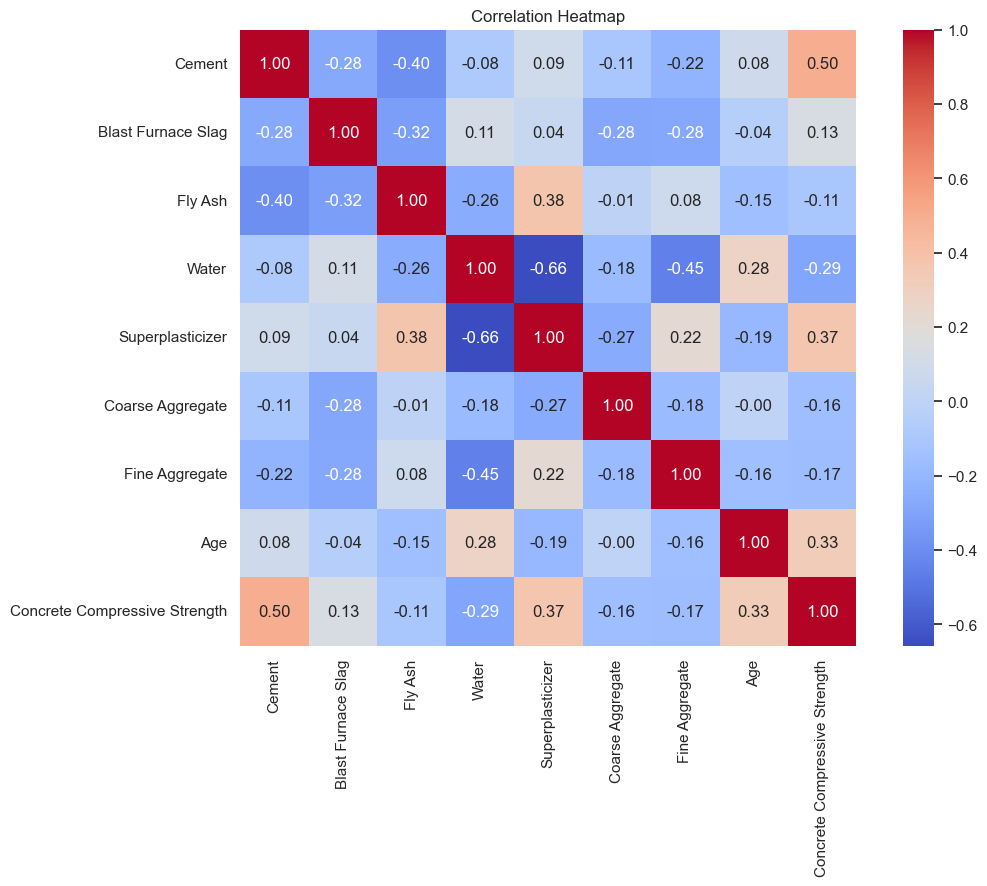

In [12]:
correlation_matrix = df.corr()  

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)  
plt.title('Correlation Heatmap')  
plt.show()

#### Relationship between Concrete Age and Compressive Strength

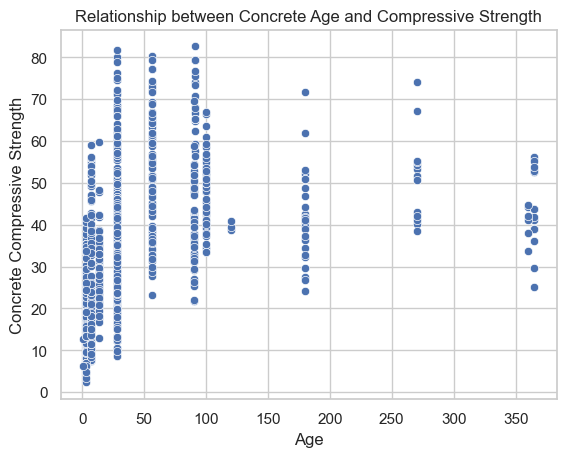

In [13]:
sns.scatterplot(x='Age', y='Concrete Compressive Strength', data=df)
plt.title('Relationship between Concrete Age and Compressive Strength')
plt.show()

The scatter plot illustrates a positive relationship between concrete age and compressive strength, indicating that strength generally increases as the age of the concrete advances. However, there is significant clustering of data points at specific ages, particularly at 0, 28, and 56 days. This clustering suggests that these ages are common testing points. Additionally, there is notable variability in compressive strength at lower ages, indicating that while age is a contributing factor to strength, other variables may also influence the results.

#### Relationship between Cement Amount and Compressive Strength

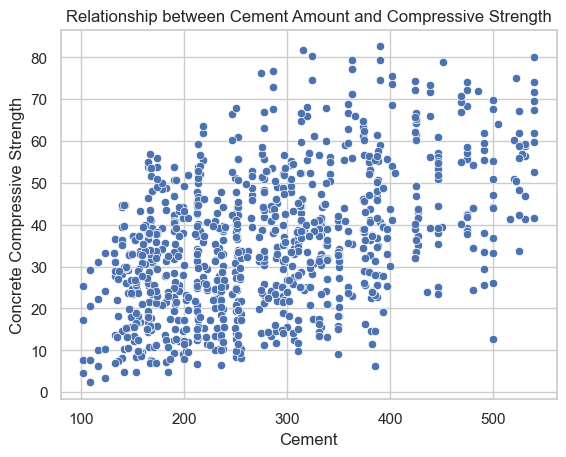

In [15]:
sns.scatterplot(x='Cement', y='Concrete Compressive Strength', data=df)
plt.title('Relationship between Cement Amount and Compressive Strength')
plt.show()

The scatter plot demonstrates a positive correlation between cement amount and concrete compressive strength, indicating that higher cement content generally contributes to increased strength. Most data points cluster around lower cement amounts (100-300 kg), but there is still considerable variability in compressive strength at higher cement levels (300-500 kg). This variability suggests that while cement content is a significant factor in determining strength, other variables may also play a role. Overall, this relationship highlights the critical importance of cement in influencing concrete quality.

## **Data Preparation**

### Remove Duplicate Data

During the data understanding stage, it was found that there were 25 duplicate entries, so these duplicate entries were removed

In [16]:
# Drop the duplicated data
df.drop_duplicates(inplace=True)

# Check again the duplicated data
df.duplicated().sum()

0

### Remove Outliers

During the data understanding stage, it was found that the data has outliers, then the outlier data is cleaned using the IQR technique

In [17]:
# Function to remove outliers
def remove_outliers(df):  
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        # Remove outliers 
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  
    
    return df  
  
df = remove_outliers(df) 

In the data preparation phase, the features and target variable are separated. The dataset is then split into training and testing sets with an 80:20 ratio. Finally, data scaling is performed using StandardScaler to standardize the features, ensuring that they are on the same scale for better model performance

### Separate Features and Target

In [18]:
X = df.drop('Concrete Compressive Strength', axis=1)
y = df['Concrete Compressive Strength']

### Split Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Data

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Modeling**

During the modeling phase, three models are used: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Each model is trained on the training data, and their performance is evaluated using the testing data to determine the best model

### Linear Regression

In [21]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

### Random Forest

In [22]:
# Model 2: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

### Gradient Boosting Regressor

In [23]:
# Model 3: Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_gb = model.predict(X_test_scaled)

### Support Vector Regressor

In [24]:
# Model 4: Support Vector Regressor
model = SVR()
model.fit(X_train_scaled, y_train)
y_pred_svr = model.predict(X_test_scaled)

## **Evaluation**

During the evaluation phase, several metrics are used to assess the model's performance:

- MAE (Mean Absolute Error): This metric measures the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

- MSE (Mean Squared Error): MSE calculates the average of the squared differences between predicted and actual values. Like MAE, a lower MSE is better, but it is more sensitive to large errors due to the squaring of differences.

- RMSE (Root Mean Squared Error): RMSE is the square root of MSE, providing an error metric in the same units as the target variable. A lower RMSE indicates a better model, with a higher sensitivity to outliers.

- R² (R-squared): This metric measures the proportion of the variance in the target variable that is explained by the model. A higher R² value (closer to 1) indicates a better fit.

- MAPE (Mean Absolute Percentage Error): MAPE calculates the average absolute percentage error between predicted and actual values. A lower MAPE value is preferred, as it represents smaller relative errors in prediction

### Linear Regression

In [25]:
print("Linear Regression Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

Linear Regression Performance
MAE: 5.28
MSE: 48.00
RMSE: 6.93
R2 Score: 0.82
MAPE: 21.90%


### Random Forest

In [26]:
print("Random Forest Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

Random Forest Performance
MAE: 3.17
MSE: 19.28
RMSE: 4.39
R2 Score: 0.93
MAPE: 12.56%


### Gradient Boosting Regressor

In [27]:
print("Gradient Boosting Regressor Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_gb):.2f}")
mape = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

Gradient Boosting Regressor Performance
MAE: 3.56
MSE: 23.08
RMSE: 4.80
R2 Score: 0.91
MAPE: 13.52%


### Support Vector Regressor

In [28]:
print("Support Vector Regressor Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_svr):.2f}")
mape = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

Support Vector Regressor Performance
MAE: 6.62
MSE: 71.58
RMSE: 8.46
R2 Score: 0.73
MAPE: 30.42%


## **Conclusion**

The performance of the four regression models: **Linear Regression, Random Forest, Gradient Boosting Regressor, and Support Vector Regressor** was evaluated using several metrics.

- **Linear Regression** demonstrated decent performance with an R² score of 0.82, indicating it explains 82% of the variance in the target variable. However, it had relatively higher error metrics, with a Mean Absolute Error (MAE) of 5.28, Mean Squared Error (MSE) of 48.00, and Root Mean Squared Error (RMSE) of 6.93, suggesting a higher degree of error in predictions. The Mean Absolute Percentage Error (MAPE) of 21.90% indicates that the model's predictions were off by an average of 21.90%.

- **Random Forest** outperformed the other models, achieving the highest R² score of 0.93, which means it explains 93% of the variance in the target variable. The error metrics were significantly lower compared to Linear Regression, with an MAE of 3.17, MSE of 19.28, and RMSE of 4.39, indicating better accuracy. The MAPE of 12.56% suggests a relatively lower error rate in predictions.

- **Gradient Boosting Regressor** also performed well, with an R² score of 0.91, indicating it explains 91% of the variance. While its error metrics were slightly higher than those of Random Forest (with an MAE of 3.56, MSE of 23.08, and RMSE of 4.80), it still outperformed Linear Regression. The MAPE of 13.52% suggests slightly higher relative errors compared to Random Forest but remains better than Linear Regression.

- **Support Vector Regressor** had the lowest performance among the models, with an R² score of 0.73, explaining only 73% of the variance. Its error metrics were higher, with an MAE of 6.62, MSE of 71.58, and RMSE of 8.46, indicating a greater degree of error in predictions. The MAPE of 30.42% reflects a significant average error in its predictions.

In conclusion, **Random Forest** performed the best in terms of both accuracy and error metrics, followed closely by **Gradient Boosting Regressor**. **Linear Regression** showed moderate performance, while **Support Vector Regressor** was the least effective for this dataset, making it less suitable for accurate predictions.